In [3]:
import json

In [4]:
import pandas as pd

In [5]:
# -*- coding: utf-8 -*-

In [6]:
path = 'E:/datasets/bitly_usagov/example.txt'

In [7]:
records = [json.loads(line)for line in open(path,encoding="utf-8")]
##要用 encoding='utf-8'

In [8]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [13]:
time_zone = [rec['tz']for rec in records if 'tz' in rec]

In [14]:
time_zone[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [15]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [16]:
counts = get_counts(time_zone)

In [19]:
counts['America/New_York']
counts['America/Denver']

191

In [21]:
len(time_zone)

3440

In [37]:
def axaxs(count_dict, n=10):
    value_key_pairs =[(counts, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [40]:
from collections import Counter

In [41]:
counts = Counter(time_zone)

In [42]:
counts.most_common(8)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36)]

In [43]:
farme = pd.DataFrame(records)

In [44]:
farme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [45]:
farme.tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [47]:
tz_counts = farme['tz'].value_counts()

In [48]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [51]:
clean_tz = farme['tz'].fillna('Missing')

In [52]:
clean_tz[clean_tz == ''] = 'Unknow'

In [56]:
tz_counts = clean_tz.value_counts()

In [58]:
tz_counts[:10]

America/New_York       1251
Unknow                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [59]:
import seaborn as sns

In [60]:
subset = tz_counts[:10]

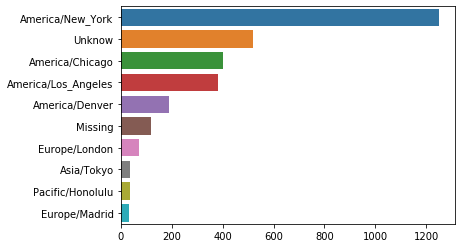

In [62]:
sns.barplot(y=subset.index,x=subset.values)

In [64]:
results = pd.Series([x.split()[0] for x in farme.a.dropna()])

In [65]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [68]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [72]:
cframe = farme[farme.a.notnull()]

In [76]:
cframe['os']= np.where(cframe['a'].str.contains('Windows'),'Windows','not Windows')

C:\Users\gg246\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
import numpy as np

In [77]:
cframe['os'][:5]

0        Windows
1    not Windows
2        Windows
3    not Windows
4        Windows
Name: os, dtype: object

In [79]:
by_tz_os = cframe.groupby(['tz','os'])

In [82]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [83]:
agg_counts[:10]

os,Windows,not Windows
tz,,
,276.0,245.0
Africa/Cairo,3.0,0.0
Africa/Casablanca,1.0,0.0
Africa/Ceuta,2.0,0.0
Africa/Johannesburg,1.0,0.0
Africa/Lusaka,1.0,0.0
America/Anchorage,1.0,4.0
America/Argentina/Buenos_Aires,0.0,1.0
America/Argentina/Cordoba,1.0,0.0


In [84]:
indexer = agg_counts.sum(1).argsort()

In [85]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [87]:
count_subest = agg_counts.take(indexer[-10:])

In [89]:
count_subest

os,Windows,not Windows
tz,,
America/Sao_Paulo,20.0,13.0
Europe/Madrid,19.0,16.0
Pacific/Honolulu,36.0,0.0
Asia/Tokyo,35.0,2.0
Europe/London,31.0,43.0
America/Denver,59.0,132.0
America/Los_Angeles,252.0,130.0
America/Chicago,285.0,115.0
,276.0,245.0


In [90]:
count_subest = count_subest.stack()

In [91]:
count_subest.name='total'

In [94]:
count_subest = count_subest.reset_index()

In [95]:
count_subest[:10]

,tz,os,total
0,America/Sao_Paulo,Windows,20.0
1,America/Sao_Paulo,not Windows,13.0
2,Europe/Madrid,Windows,19.0
3,Europe/Madrid,not Windows,16.0
4,Pacific/Honolulu,Windows,36.0
5,Pacific/Honolulu,not Windows,0.0
6,Asia/Tokyo,Windows,35.0
7,Asia/Tokyo,not Windows,2.0
8,Europe/London,Windows,31.0
9,Europe/London,not Windows,43.0


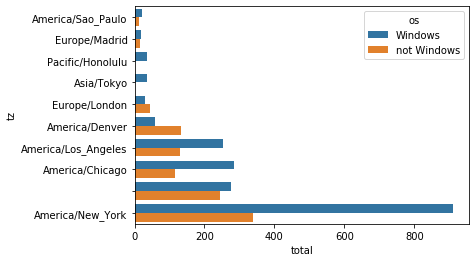

In [96]:
sns.barplot(x='total',y='tz',hue='os', data=count_subest)

In [106]:
def norm_total(group):
    group['ax'] = group.total /group.total.sum()
    return group

In [108]:
results = count_subest.groupby('tz').apply(norm_total)

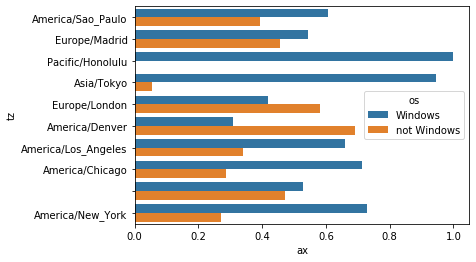

In [109]:
sns.barplot(x='ax',y='tz',hue='os', data=results)

In [110]:
results[:10]

,tz,os,total,ax
0,America/Sao_Paulo,Windows,20.0,0.606061
1,America/Sao_Paulo,not Windows,13.0,0.393939
2,Europe/Madrid,Windows,19.0,0.542857
3,Europe/Madrid,not Windows,16.0,0.457143
4,Pacific/Honolulu,Windows,36.0,1.000000
5,Pacific/Honolulu,not Windows,0.0,0.000000
6,Asia/Tokyo,Windows,35.0,0.945946
7,Asia/Tokyo,not Windows,2.0,0.054054
8,Europe/London,Windows,31.0,0.418919
9,Europe/London,not Windows,43.0,0.581081
